# Walmart Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from utils import TimeseriesExperiment, Dataset


In [2]:
df_store = pd.read_csv('data/walmart-sales/stores.csv')

df_train = pd.read_csv('data/walmart-sales/train.csv')

df_features = pd.read_csv('data/walmart-sales/features.csv')

# Get data from one store
df = df_train[df_train['Store'] == 1]
df = df[df['Dept'] == 1]
# TODO: Use is holiday parameter
df = df.drop(['Store', 'Dept', 'IsHoliday'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').resample('W').mean()

df.head()

,Weekly_Sales
Date,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


In [3]:
def get_series_from_dataframe(dataframe):
    s = TimeSeries.from_dataframe(dataframe, freq='W', fill_missing_dates=True)
    # s = s.slice_n_points_before(s.end_time(), TRAIN_DAYS*24*60)
    # s = s.resample('1week', method='pad')

    return s

series = get_series_from_dataframe(df)

<Axes: xlabel='Date'>

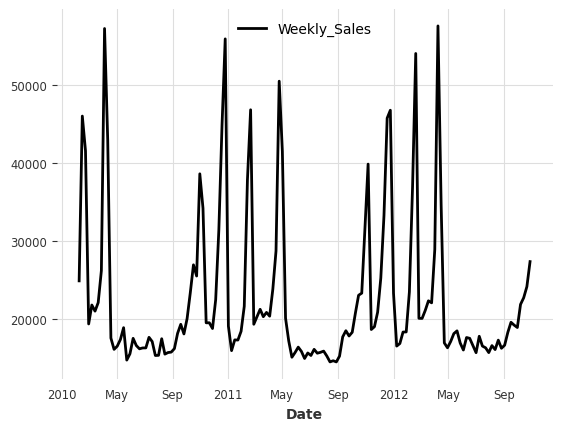

In [4]:
series['Weekly_Sales'].plot()
# (series['IsHoliday'] * series['Weekly_Sales'].max()).plot()

In [5]:
dataset = Dataset(series, 'Weekly_Sales')

In [8]:
from darts.models import NaiveSeasonal

model = NaiveSeasonal(K=1)

experiment1 = TimeseriesExperiment(model, dataset, {})

experiment1.run()

No parameters to search


{'mape': 36.47226637545644,
 'mse': 192931609.77643767,
 'rmse': 13889.982353352278,
 'mae': 8607.447971014495,
 'model': 'NaiveSeasonal',
 'forecast_horizon': 3,
 'dataset': 'Weekly_Sales',
 'experiment_time': 1714401151.471982,
 'parameters': OrderedDict([('K', 1)])}

In [11]:
# arima
from darts.models import ARIMA

model = ARIMA()

experiment2 = TimeseriesExperiment(model, dataset, {
    'p': [1],
    'd': [1],
    'q': [1]
})

experiment2.run()

ValueError: Please pass exactly one of the arguments 'forecast_horizon', 'val_target_series' or 'use_fitted_values'.


ValueError: Please pass exactly one of the arguments 'forecast_horizon', 'val_target_series' or 'use_fitted_values'.